In [2]:
import numpy as np
import pandas as pd
import seaborn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
cars=pd.read_csv('C:/Users/ludo1/Python for Data analysis/TD1/cars.csv',sep=";")
cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US


In [4]:
cars.dtypes

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model             int64
Origin           object
dtype: object

# Analyse rapide

In [5]:
origin=cars["Origin"]
origin=set(origin)
origin

{'Europe', 'Japan', 'US'}

In [39]:
model=set(cars["Model"])
model

{70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82}

In [42]:
total_voiture=cars.pivot_table('Car',index="Model",columns="Origin",aggfunc= 'count')
total_voiture

Origin,Europe,Japan,US
Model,,,
70,6,2,27
71,5,4,20
72,5,5,18
73,7,4,29
74,6,6,15
75,6,4,20
76,8,4,22
77,4,6,18
78,6,8,22


In [44]:
cars.groupby("Origin").Cylinders.count().sort_values()
#print(cars['Origin'].value_counts()) autre manière de compter

Origin
Europe     73
Japan      79
US        254
Name: Cylinders, dtype: int64

In [8]:
cars[(cars.Origin=="US")].groupby("Model").Acceleration.mean().sort_values()

Model
70    11.685185
73    13.620690
72    14.055556
71    14.575000
77    15.238889
79    15.243478
78    15.545455
76    15.786364
74    15.966667
81    16.053846
75    16.350000
82    16.670000
80    16.800000
Name: Acceleration, dtype: float64

In [48]:
meilleur=cars.sort_values(by="Origin")[-5:]
meilleur

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
147,AMC Matador (sw),14.0,8,304.0,150.0,4257.0,15.5,74,US
146,Ford Gran Torino (sw),14.0,8,302.0,140.0,4638.0,16.0,74,US
145,Dodge Coronet Custom (sw),14.0,8,318.0,150.0,4457.0,13.5,74,US
143,Ford Gran Torino,16.0,8,302.0,140.0,4141.0,14.0,74,US
405,Chevy S-10,31.0,4,119.0,82.0,2720.0,19.4,82,US


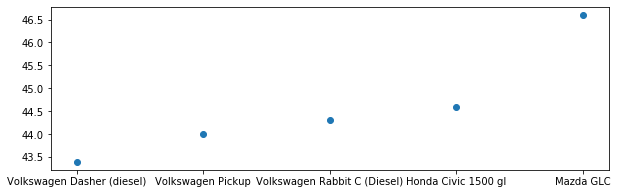

In [14]:
fig = plt.figure(1, figsize=(10, 3))
plt.scatter(meilleur.Car[-5:],meilleur.MPG[-5:])

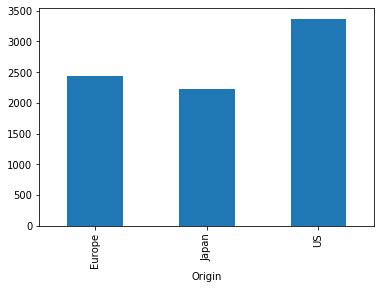

In [33]:
cars.groupby("Origin").Weight.mean().plot(kind="bar")

<AxesSubplot:xlabel='Model'>

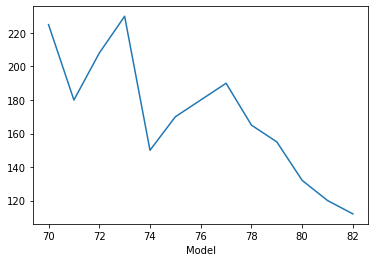

In [61]:
cars.groupby("Model").Horsepower.max().plot()

(array([  4.,   0., 207.,   0.,   3.,   0.,  84.,   0.,   0., 108.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

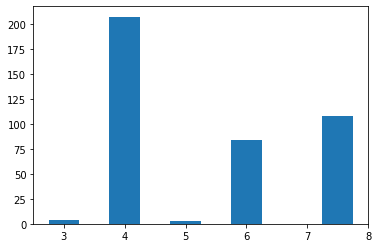

In [20]:
plt.hist(cars["Cylinders"], align="left")

In [18]:
cars.groupby("Cylinders").Car.count()

Cylinders
3      4
4    207
5      3
6     84
8    108
Name: Car, dtype: int64